<a href="https://colab.research.google.com/github/phoenix22337/IS_4487_Tokyo/blob/main/Zhan_Natitwood_day3_lab_retailer_intro_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 Lab, IS 4487

Outline

Repeat exercises from Lab 2, for practice, but with the *SuperStore Retail Orders* dataset

- Loading installed packages
- Inspect data
- Clean data
- Summarize data
- Explore plot types and search for insights

Please use the Gemini AI tool to get coding ideas.



# Notebook Instructions
- Remember to save a copy of the notebook in Drive so that you can save your changes.
- Complete the Assignment Tasks.
- When you are done revising this notebook save your changes to GitHub and upload the URL for the file to Canvas for the assignment.
- Some of these assignments ask you to do things we have not covered yet.  Use AI to come up with a solution.

# Load Libraries

➡️ Assignment Tasks
- Load Pandas

In [87]:
# your code goes here
import pandas as pd
import matplotlib as mpl
import sklearn as sl

# Load Data

In [88]:
ss = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/main/Labs/DataSets/superstore_retail_orders.csv")

# Summarize and Review Data

➡️ Assignment Tasks

- Describe or profile the dataframe

In [89]:
# Your code goes here
ss.describe()

,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


In [90]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [91]:
ss.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99


In [92]:
ss.tail()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
56040,74084,2022-06-29,2022-06,Ian Rogers,Port Mark,ALABAMA,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56041,74062,2022-06-29,2022-06,Marcus Anderson,West Aprilfurt,NEBRASKA,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56042,74065,2022-06-29,2022-06,Nathaniel Howard,New Lindaview,ILLINOIS,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56043,74038,2022-06-29,2022-06,Robin Sanz,West Frankhaven,ARKANSAS,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56044,74110,2022-06-30,2022-06,Mallory Jimenez,Dillonhaven,MARYLAND,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62


# Prepare Data

➡️ Assignment Tasks
- Remove rows with empty (NULL) values
- Locate outliers in any of the variables.   Filter them out if they appear to be mistakes; keep them if they are exceptional cases.
- Create a new field: total_purchase. This should be product_price x quantity.

In [93]:
# Drop NAs
ss.dropna(inplace=True)

In [96]:
# Search for and filter outliers
ss.loc[ss['quantity'] > 1000]


,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
55310,66470,2022-03-19,2022-03,Lisa Wang,Baileychester,SOUTH DAKOTA,2000.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62


In [97]:
ss.drop(ss.loc[ss['quantity'] > 2000].index, inplace=True)

In [100]:
ss.loc[ss['product_price'] > 3000]

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
44591,45089,2020-01-03,2020-01,Jenna Lopez,New Danielburgh,ALASKA,1.0,"Projector Black, 48",Projector,3374.99
44592,45170,2020-01-16,2020-01,Laura Lin,Port Joshuashire,ARIZONA,1.0,"Projector Black, 48",Projector,3374.99
44593,45179,2020-01-17,2020-01,Jaime Gutierrez,West Nathanchester,WASHINGTON,1.0,"Projector Black, 48",Projector,3374.99
44595,45406,2020-02-10,2020-02,Hunter Kumar,South Dillonberg,IDAHO,1.0,"Projector Black, 48",Projector,3374.99
44596,45585,2020-03-01,2020-03,Isaiah Ramirez,Port Nathan,OREGON,1.0,"Projector Black, 48",Projector,3374.99
...,...,...,...,...,...,...,...,...,...,...
46339,46576,2020-06-27,2020-06,Alisha She,North Tammy,WYOMING,1.0,Gaming Laptop Black,Laptop,3578.27
46340,46583,2020-06-27,2020-06,Jerome Suarez,East Michael,OKLAHOMA,1.0,Gaming Laptop Black,Laptop,3578.27
46341,46580,2020-06-27,2020-06,Ruben Subram,Hillport,KENTUCKY,1.0,Gaming Laptop Black,Laptop,3578.27
46342,46591,2020-06-29,2020-06,Samantha Taylor,Salt Lake City,UTAH,1.0,Gaming Laptop Black,Laptop,3578.27


In [99]:
ss.drop(ss.loc[ss['product_price'] > 4000].index, inplace=True)

In [101]:
# create total_purchase
ss['total_purchase'] = ss['product_price'] * ss['quantity']

Check that your cleaning worked

In [102]:
# your code goes here
ss.describe()

,order_id,quantity,product_price,total_purchase
count,54173.000000,54173.000000,54173.000000,5.417300e+04
mean,61642.138224,1.553025,614.109579,7.973136e+02
std,7518.845903,9.284931,816.673965,1.412708e+04
min,45079.000000,1.000000,2.290000,2.290000e+00
25%,55623.000000,1.000000,7.950000,1.497000e+01
50%,61855.000000,1.000000,475.600000,4.756000e+02
75%,68063.000000,2.000000,914.620000,1.000440e+03
max,74147.000000,2000.000000,3578.270000,2.024994e+06


In [103]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54173 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          54173 non-null  int64  
 1   order_date        54173 non-null  object 
 2   order_year_month  54173 non-null  object 
 3   customer_name     54173 non-null  object 
 4   city              54173 non-null  object 
 5   state_province    54173 non-null  object 
 6   quantity          54173 non-null  float64
 7   product_name      54173 non-null  object 
 8   product_line      54173 non-null  object 
 9   product_price     54173 non-null  float64
 10  total_purchase    54173 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 5.0+ MB


# Summarize Data

➡️ Assignment Tasks
- Calculate the average price per year-month
- Calculate the total revenue per year month

Does more cleaning need to be done? If so, do it and then recreate the above summary tables.

In [108]:
# average price
ss.groupby(['order_year_month'])['product_price'].mean()

order_year_month
2020-01    3172.420978
2020-02    3199.469359
2020-03    3242.035279
2020-04    3194.646275
2020-05    3192.571359
2020-06    3132.275911
2020-07    1959.974251
2020-08    1924.981087
2020-09    1764.130833
2020-10    1800.830762
2020-11    1666.368901
2020-12    1729.697795
2021-01    1774.621612
2021-02    1755.272269
2021-03    1760.495962
2021-04    1691.161107
2021-05    1640.100368
2021-06    1694.477581
2021-07     729.851550
2021-08     409.107649
2021-09     437.462140
2021-10     434.127245
2021-11     468.310875
2021-12     500.330821
2022-01     469.658801
2022-02     481.718170
2022-03     485.362163
2022-04     482.481023
2022-05     513.701953
2022-06     509.168107
Name: product_price, dtype: float64

In [109]:
# total revenue
ss.groupby(['order_year_month'])['total_purchase'].sum()

order_year_month
2020-01    4745149.93
2020-02     499117.22
2020-03     706668.08
2020-04     651707.84
2020-05     657669.70
2020-06     635852.01
2020-07     484113.64
2020-08     531294.78
2020-09     338713.12
2020-10     401585.26
2020-11     303279.14
2020-12     556962.69
2021-01     429458.43
2021-02     456370.79
2021-03     466531.43
2021-04     488745.56
2021-05     534672.72
2021-06     525288.05
2021-07    1072057.49
2021-08    1782453.48
2021-09    1864925.94
2021-10    2012010.82
2021-11    2152333.56
2021-12    2890764.61
2022-01    2398289.17
2022-02    2355462.16
2022-03    4440127.06
2022-04    2685226.38
2022-05    3049943.70
2022-06    2959952.22
Name: total_purchase, dtype: float64

In [106]:
ss.drop(ss.loc[ss['order_date'] > '2023-01-01' ].index, inplace=True)

In [107]:
ss.drop(ss.loc[ss['order_date'] < '2000-01-01' ].index, inplace=True)

# Plot Data

➡️ Assignment Tasks
- Produce two plots that show patterns or relationships in the data.
- Interpret these patterns for potential value to the business.  

<Axes: xlabel='quantity', ylabel='product_price'>

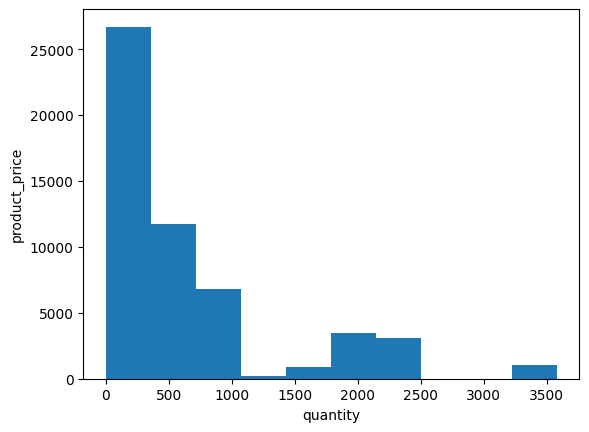

In [110]:
# Your code goes here.  Plot 1
ss['product_price'].plot(kind='hist', xlabel = 'quantity', ylabel = 'product_price')

<Axes: xlabel='order_year_month'>

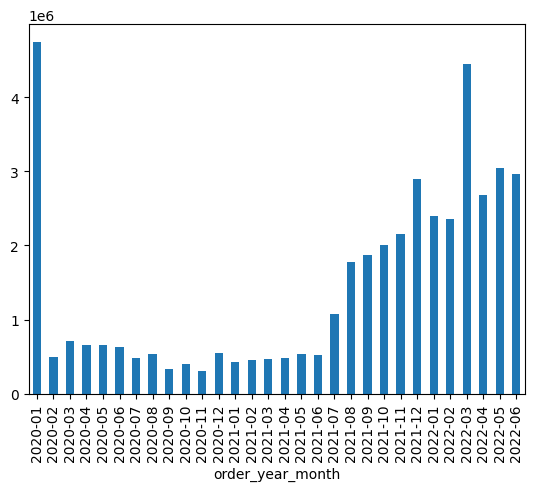

In [111]:
# Your code goes here.  Plot 2
ss.groupby(['order_year_month'])['total_purchase'].sum().plot(kind='bar')

Make an interpretive comment.

From the first graph we can see that products with a higher price have lower quantity sold

From the second graph we can see that as time goes on the revenue made rises
